<a href="https://colab.research.google.com/github/sv1811/crop_detection/blob/main/Crop_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving VV_VH_updated.csv to VV_VH_updated.csv


In [ ]:
df =pd.read_csv("VV_VH_updated.csv")

In [ ]:

df['Name'] = df['Name'].replace(['Jowar'], ['jowar'])
df['Name'] = df['Name'].replace(['tobacco '], ['tobacco'])
df['Name'] = df['Name'].replace(['cotton '], ['cotton'])
df['Name'] = df['Name'].replace(['sugercane'], ['sugarcane'])
df['Name'] = df['Name'].replace(['gram'], ['red gram'])
df['Name'] = df['Name'].replace(['red gram '], ['red gram'])
print(df['Name'].unique())
print(df.last)


['cotton' 'red gram' 'jowar' 'moong bean' 'sugarcane' 'tobacco' 'wheat']
<bound method NDFrame.last of     FID      Name BeginTime        VV       VH
0     0    cotton   07:50.0  -8.72367 -14.7679
1     1    cotton   37:54.0  -9.99937 -16.0773
2     2    cotton   01:13.0  -9.02233 -15.5683
3    27    cotton   57:11.0 -10.83770 -17.3339
4    30    cotton   18:59.0 -10.81400 -17.6478
..  ...       ...       ...       ...      ...
85  100  red gram   43:31.0  -9.86651 -15.7689
86  101  red gram   39:26.0 -12.23320 -18.4750
87  102  red gram   41:37.0  -9.71889 -17.0028
88   41  red gram   05:05.0  -9.05210 -15.0323
89   19  red gram   03:31.0 -11.57720 -16.4004

[90 rows x 5 columns]>


In [ ]:
df = df.drop(['FID','BeginTime'], axis=1)

In [ ]:
myarr = (df.Name.unique())
length = len(myarr)
for i in range(7):
  df['Name'] = df['Name'].replace([myarr[i]], [i])

In [ ]:
df_train = df.head(60)
df_valid = df.drop(df_train.index)
print(df_train)


    Name        VV       VH
0      0  -8.72367 -14.7679
1      0  -9.99937 -16.0773
2      0  -9.02233 -15.5683
3      0 -10.83770 -17.3339
4      0 -10.81400 -17.6478
5      0 -10.44380 -17.0087
6      0 -10.84850 -18.4933
7      0 -10.27930 -16.7152
8      1 -10.94470 -17.6816
9      2 -10.44130 -15.5317
10     2 -10.96070 -16.5754
11     2 -10.36670 -17.5323
12     3  -8.69032 -15.8130
13     3  -9.55796 -14.8644
14     3  -9.02968 -15.7682
15     4  -9.81261 -17.5437
16     4  -9.72570 -15.5728
17     4  -9.79443 -14.8190
18     5  -8.17742 -15.2577
19     5  -6.86685 -14.6749
20     5  -7.24664 -12.8101
21     5  -6.93179 -14.4720
22     6 -10.13750 -17.5698
23     6 -10.39780 -15.6874
24     6 -10.98800 -17.5499
25     1  -8.11648 -15.2601
26     1 -10.19320 -15.0646
27     1 -10.19710 -15.1931
28     1  -8.93821 -15.8401
29     1 -10.77260 -16.3436
30     1  -9.10362 -15.4577
31     1  -9.03243 -15.6795
32     1 -10.29810 -16.3322
33     1 -11.61780 -18.0712
34     1 -10.44660 -

In [ ]:
X_train = df_train.drop('Name', axis =1)
X_valid = df_valid.drop('Name', axis=1)
y_train = df_train['Name']
y_valid = df_valid['Name']
print(y_train)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     2
10    2
11    2
12    3
13    3
14    3
15    4
16    4
17    4
18    5
19    5
20    5
21    5
22    6
23    6
24    6
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    1
47    1
48    1
49    1
50    1
51    1
52    1
53    1
54    1
55    1
56    1
57    1
58    1
59    1
Name: Name, dtype: int64


In [ ]:
model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=4, activation='relu', input_shape=[2]),
    layers.Dense(units=3, activation='relu'),
    # the linear output layer
    layers.Dense(units=1),
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='mae',
     metrics=['accuracy']
)

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(Dense(units=1))

In [ ]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(X_train, y_train, epochs =100, batch_size=32)


Epoch 1/100
2/2 [==============================] - 3s 29ms/step - loss: 4.8551
Epoch 2/100
2/2 [==============================] - 0s 18ms/step - loss: 4.6914
Epoch 3/100
2/2 [==============================] - 0s 18ms/step - loss: 4.5980
Epoch 4/100
2/2 [==============================] - 0s 17ms/step - loss: 4.2464
Epoch 5/100
2/2 [==============================] - 0s 13ms/step - loss: 4.1664
Epoch 6/100
2/2 [==============================] - 0s 13ms/step - loss: 3.9429
Epoch 7/100
2/2 [==============================] - 0s 12ms/step - loss: 3.8520
Epoch 8/100
2/2 [==============================] - 0s 15ms/step - loss: 3.7148
Epoch 9/100
2/2 [==============================] - 0s 15ms/step - loss: 3.6410
Epoch 10/100
2/2 [==============================] - 0s 15ms/step - loss: 3.6005
Epoch 11/100
2/2 [==============================] - 0s 22ms/step - loss: 3.3744
Epoch 12/100
2/2 [==============================] - 0s 18ms/step - loss: 3.2525
Epoch 13/100
2/2 [==============================]

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=32,
    epochs=300,
)

Epoch 1/300
2/2 [==============================] - 2s 460ms/step - loss: 1.9137 - accuracy: 0.1333 - val_loss: 1.1533 - val_accuracy: 0.0000e+00
Epoch 2/300
2/2 [==============================] - 0s 106ms/step - loss: 1.8188 - accuracy: 0.1333 - val_loss: 1.0574 - val_accuracy: 0.0000e+00
Epoch 3/300
2/2 [==============================] - 0s 146ms/step - loss: 1.7223 - accuracy: 0.1333 - val_loss: 0.9615 - val_accuracy: 0.0000e+00
Epoch 4/300
2/2 [==============================] - 0s 76ms/step - loss: 1.6440 - accuracy: 0.1333 - val_loss: 0.8676 - val_accuracy: 0.0000e+00
Epoch 5/300
2/2 [==============================] - 0s 69ms/step - loss: 1.5739 - accuracy: 0.1333 - val_loss: 0.7762 - val_accuracy: 0.0000e+00
Epoch 6/300
2/2 [==============================] - 0s 70ms/step - loss: 1.5107 - accuracy: 0.1333 - val_loss: 0.6850 - val_accuracy: 0.0000e+00
Epoch 7/300
2/2 [==============================] - 0s 74ms/step - loss: 1.4463 - accuracy: 0.1333 - val_loss: 0.5942 - val_accuracy: 

In [ ]:
pred = model.predict(X_valid)

1/1 [==============================] - 0s 105ms/step


In [ ]:
print(pred)

[[1.006472  ]
 [0.9839577 ]
 [1.0043213 ]
 [1.008077  ]
 [1.0012751 ]
 [1.0223906 ]
 [0.9788079 ]
 [1.0368961 ]
 [0.9134011 ]
 [0.99798304]
 [1.0282841 ]
 [1.0247717 ]
 [1.0013607 ]
 [0.9549554 ]
 [0.86452   ]
 [1.0389973 ]
 [0.97230643]
 [1.0646994 ]
 [0.99315375]
 [1.0081887 ]
 [1.0600212 ]
 [1.0087998 ]
 [0.97377014]
 [1.0095316 ]
 [1.0937707 ]
 [1.0064445 ]
 [1.168431  ]
 [1.0338031 ]
 [0.95590025]
 [1.0881573 ]]


In [ ]:
print(y_valid)

60    1
61    1
62    1
63    1
64    1
65    1
66    1
67    1
68    1
69    1
70    1
71    1
72    1
73    1
74    1
75    1
76    1
77    1
78    1
79    1
80    1
81    1
82    1
83    1
84    1
85    1
86    1
87    1
88    1
89    1
Name: Name, dtype: int64


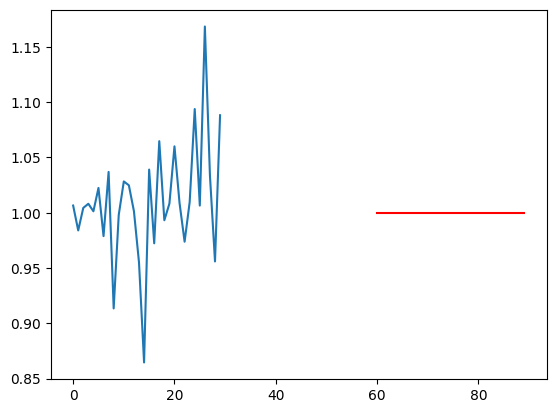

In [ ]:
plt.plot(pred)
plt.plot(y_valid, color='red')
plt.show()
print(model.optimizer)

In [ ]:
a = [0 for x in range(30)]
print(a)
j=60
sum =0
add=0
for i in range(30):
  a[i] = (pred[i] - y_valid[j])
  a[i] = a[i]**2
  j=j+1
  sum = sum + a[i]
  add = add + pred[i]

print(a)
print(sum)
print(sum/30)
print(add/30)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[array([4.1886673e-05], dtype=float32), array([0.00025736], dtype=float32), array([1.867395e-05], dtype=float32), array([6.523834e-05], dtype=float32), array([1.6257845e-06], dtype=float32), array([0.00050134], dtype=float32), array([0.0004491], dtype=float32), array([0.00136132], dtype=float32), array([0.00749936], dtype=float32), array([4.068134e-06], dtype=float32), array([0.00079999], dtype=float32), array([0.00061364], dtype=float32), array([1.8513815e-06], dtype=float32), array([0.00202902], dtype=float32), array([0.01835483], dtype=float32), array([0.00152079], dtype=float32), array([0.00076693], dtype=float32), array([0.00418601], dtype=float32), array([4.6871126e-05], dtype=float32), array([6.705521e-05], dtype=float32), array([0.00360254], dtype=float32), array([7.743633e-05], dtype=float32), array([0.00068801], dtype=float32), array([9.0851725e-05], dtype=float32), array([0.00879295], 

In [ ]:
score = model.evaluate(X_valid, y_valid)
print(score[1])
print(model.summary())

1/1 [==============================] - 0s 32ms/step - loss: 0.0375 - accuracy: 1.0000
1.0
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 3)                 15        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
None
